In [0]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from fbprophet import Prophet

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [0]:
file_url = "https://raw.githubusercontent.com/eraldoluis/lia-covid19ms/master/data/dadoscampogrande.csv"
dfcg = pd.read_csv(file_url)

file_url = "https://raw.githubusercontent.com/eraldoluis/lia-covid19ms/master/data/dadosms.csv"
dfms = pd.read_csv(file_url)

dftodos = pd.concat([dfms, dfcg])

dftodos.Date = dftodos.Date.map(lambda x : datetime.datetime.strptime(x, "%m-%d-%Y"))
dfms.Date = dfms.Date.map(lambda x : datetime.datetime.strptime(x, "%m-%d-%Y"))
dfcg.Date = dfcg.Date.map(lambda x : datetime.datetime.strptime(x, "%m-%d-%Y"))

In [0]:
dfcg.tail(10)

,State,Country,Last Update,Confirmed,Deaths,Recovered,Date,Latitude,Longitude,Suspected,Discarded,Excluded
20,"Campo Grande, MS",Brazil,NaN,19,0,0,2020-03-23,NaN,NaN,48.0,NaN,NaN
21,"Campo Grande, MS",Brazil,NaN,22,0,0,2020-03-24,NaN,NaN,21.0,NaN,NaN
22,"Campo Grande, MS",Brazil,NaN,22,0,0,2020-03-25,NaN,NaN,15.0,NaN,NaN
23,"Campo Grande, MS",Brazil,NaN,23,0,0,2020-03-26,NaN,NaN,23.0,NaN,NaN
24,"Campo Grande, MS",Brazil,NaN,24,0,0,2020-03-27,NaN,NaN,9.0,NaN,NaN
25,"Campo Grande, MS",Brazil,NaN,25,0,0,2020-03-28,NaN,NaN,13.0,NaN,NaN
26,"Campo Grande, MS",Brazil,NaN,29,0,0,2020-03-29,NaN,NaN,21.0,NaN,NaN
27,"Campo Grande, MS",Brazil,NaN,36,0,0,2020-03-30,NaN,NaN,21.0,NaN,NaN
28,"Campo Grande, MS",Brazil,NaN,37,0,0,2020-03-31,NaN,NaN,17.0,NaN,NaN
29,"Campo Grande, MS",Brazil,NaN,38,0,0,2020-04-01,NaN,NaN,18.0,NaN,NaN


In [0]:
dfms.tail(10)

,State,Country,Last Update,Confirmed,Deaths,Recovered,Date,Latitude,Longitude,Suspected,Discarded,Excluded
20,MS,Brazil,NaN,21,0,0,2020-03-23,NaN,NaN,70,198,11
21,MS,Brazil,NaN,24,0,0,2020-03-24,NaN,NaN,38,256,11
22,MS,Brazil,NaN,24,0,0,2020-03-25,NaN,NaN,34,289,11
23,MS,Brazil,NaN,25,0,0,2020-03-26,NaN,NaN,53,299,11
24,MS,Brazil,NaN,28,0,0,2020-03-27,NaN,NaN,51,337,11
25,MS,Brazil,NaN,31,0,0,2020-03-28,NaN,NaN,47,360,11
26,MS,Brazil,NaN,36,0,0,2020-03-29,NaN,NaN,44,388,11
27,MS,Brazil,NaN,44,0,0,2020-03-30,NaN,NaN,51,418,11
28,MS,Brazil,NaN,48,1,0,2020-03-31,NaN,NaN,38,457,11
29,MS,Brazil,NaN,51,1,0,2020-04-01,NaN,NaN,39,494,11


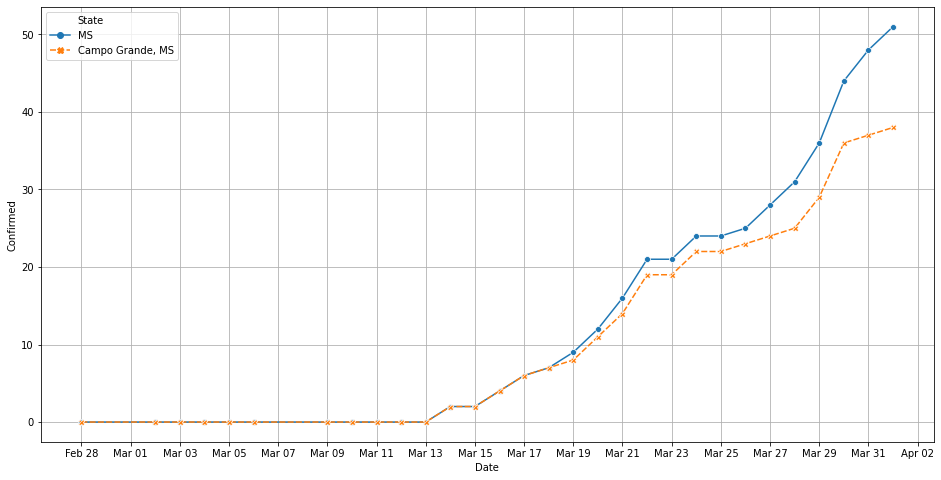

In [0]:
import matplotlib.dates as mdates

_,ax = plt.subplots(figsize=(16,8))

ax.grid(True)
ax.set(xscale="linear", yscale="linear")

# Set ticks every two days.
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
# Set major ticks format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


sns.lineplot(x="Date", y="Confirmed", hue="State", markers=True, data=dftodos, style="State", ax=ax)

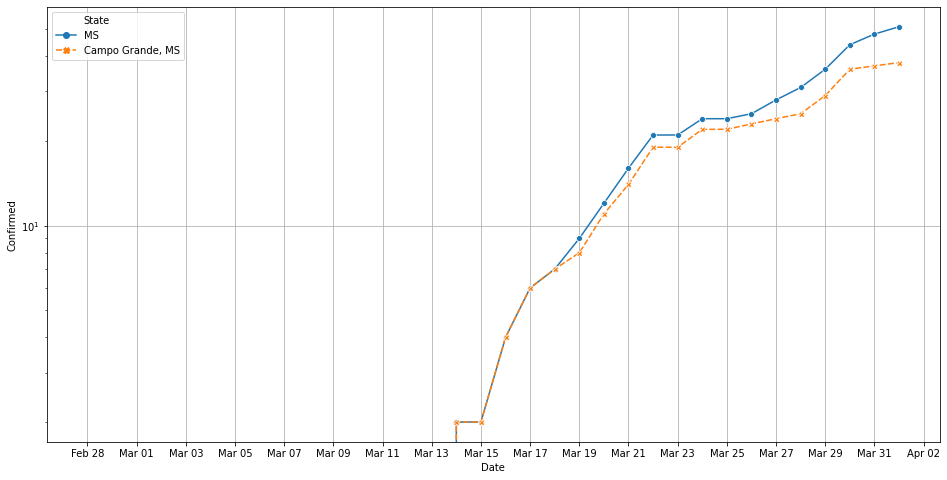

In [0]:
_,ax = plt.subplots(figsize=(16,8))

ax.grid(True)
ax.set(xscale="linear", yscale="log")

# Set ticks every two days.
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
# Set major ticks format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


sns.lineplot(x="Date", y="Confirmed", hue="State", markers=True, data=dftodos, style="State", ax=ax)

#Modelo de predição

## Brasil

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")

dfpred = df.copy().groupby('date').sum().reset_index()

dfpred = dfpred[['date','totalCases']]

dfpred.columns = ['ds', 'y']

dfpred.tail(10)

,ds,y
24,2020-03-26,5972
25,2020-03-27,6944
26,2020-03-28,7868
27,2020-03-29,8644
28,2020-03-30,9326
29,2020-03-31,11660
30,2020-04-01,13834
31,2020-04-02,16198
32,2020-04-03,18438
33,2020-04-04,18504


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


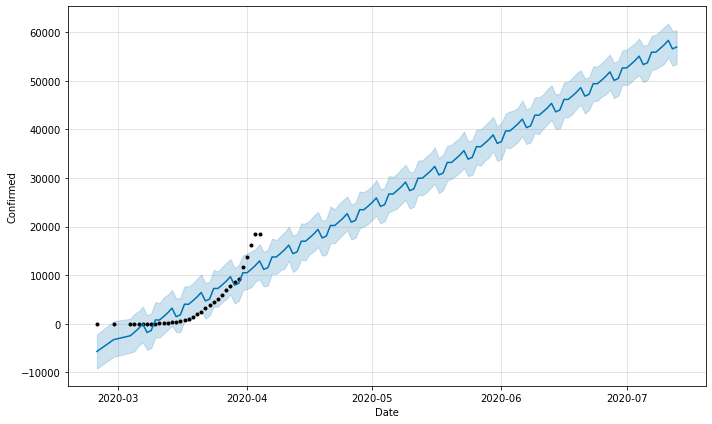

In [0]:
model_cc=Prophet()
model_cc.fit(dfpred)

future = model_cc.make_future_dataframe(periods=100)

forecast=model_cc.predict(future)
forecast.head(5)

fig_Confirmed = model_cc.plot(forecast,xlabel = "Date",ylabel = "Confirmed")

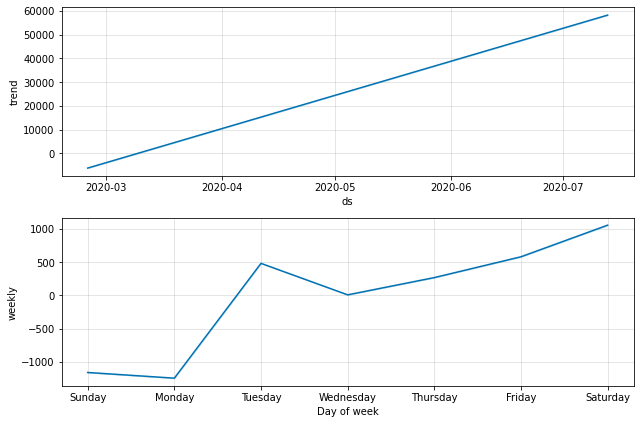

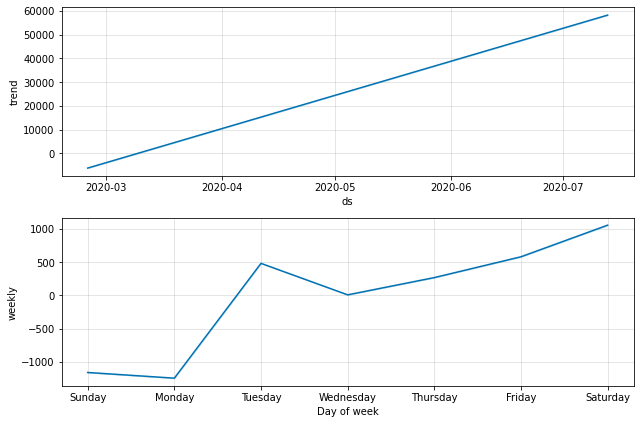

In [0]:
model_cc.plot_components(forecast)

## MS

In [0]:
dfpred = dfcg.copy()

dfpred = dfpred[['Date','Confirmed']]
dfpred.columns = ['ds', 'y']

dfpred['y'] = pd.to_numeric(dfpred['y'], downcast='float')

dfpred.tail()

,ds,y
25,2020-03-28,25.0
26,2020-03-29,29.0
27,2020-03-30,36.0
28,2020-03-31,37.0
29,2020-04-01,38.0


In [0]:
model_cc=Prophet()
model_cc.fit(dfpred)

future = model_cc.make_future_dataframe(periods=100)
future.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds
0,2020-02-28
1,2020-03-02
2,2020-03-03
3,2020-03-04
4,2020-03-05


In [0]:
forecast=model_cc.predict(future)
forecast.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-28,-11.407073,-16.753041,-4.429431,-11.407073,-11.407073,0.772681,0.772681,0.772681,0.772681,0.772681,0.772681,0.0,0.0,0.0,-10.634392
1,2020-03-02,-7.630076,-12.927844,0.429244,-7.630076,-7.630076,1.792005,1.792005,1.792005,1.792005,1.792005,1.792005,0.0,0.0,0.0,-5.838071
2,2020-03-03,-6.371077,-11.493299,1.948228,-6.371077,-6.371077,1.731541,1.731541,1.731541,1.731541,1.731541,1.731541,0.0,0.0,0.0,-4.639536
3,2020-03-04,-5.112078,-10.916874,2.268976,-5.112078,-5.112078,0.871031,0.871031,0.871031,0.871031,0.871031,0.871031,0.0,0.0,0.0,-4.241047
4,2020-03-05,-3.853079,-11.695076,0.646644,-3.853079,-3.853079,-1.625589,-1.625589,-1.625589,-1.625589,-1.625589,-1.625589,0.0,0.0,0.0,-5.478668


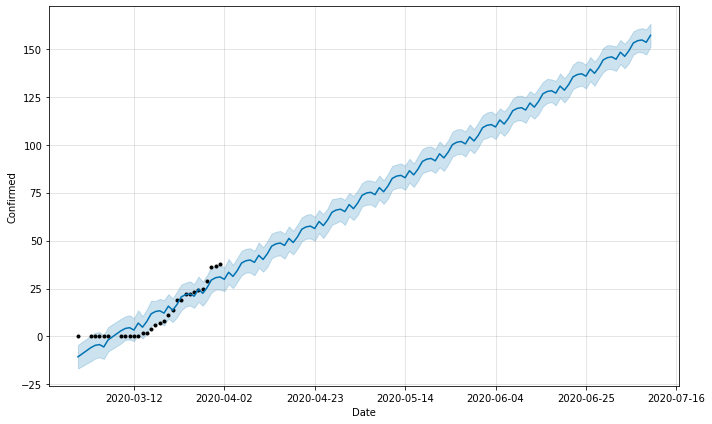

In [0]:
fig_Confirmed = model_cc.plot(forecast,xlabel = "Date",ylabel = "Confirmed")